In [56]:
import torch
from common.authors_code.load_files import load_compressed_tensor, VideoReader
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [17]:
t = load_compressed_tensor("../data/test_data/gt_motion.pth").to(device)

In [18]:
t.device

device(type='cuda', index=0)

In [19]:
t[0][0].mean()

tensor(0.7156, device='cuda:0')

In [20]:
t[0][1].mean()

tensor(0.2921, device='cuda:0')

In [21]:
t[0][1].mean()

tensor(0.2921, device='cuda:0')

In [24]:
video_loader = VideoReader("../data/test_data/sample_video.mp4")

In [25]:
video_loader.frame_shape

(612, 1280, 3)

In [26]:
t.shape

torch.Size([1, 2, 612, 1280])

In [32]:
video_mtn_path = load_compressed_tensor("../data/test_data/pair_video.pth").to(device)

In [34]:
video_frame = video_loader.get_frame(0)

In [36]:
video_frame = torch.tensor(video_frame).to(device)

In [37]:
video_frame.shape

torch.Size([612, 1280, 3])

In [63]:
def draw_lines(image, x_coord, y_coord, thickness):
    image = image.clone()
    for i in range(-thickness, thickness):
        image[y_coord+i] = 0
        image[:,x_coord+i] = 0

    return image


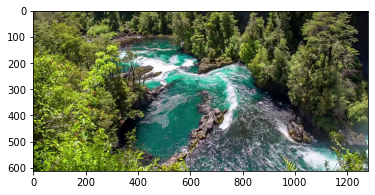

In [42]:
plt.imshow(video_frame.cpu())

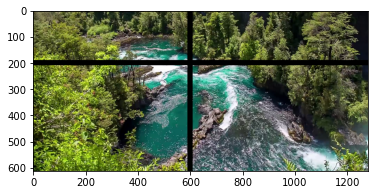

In [54]:
drawn_img = draw_lines(video_frame, 600, 200, 10)
plt.imshow(drawn_img.cpu())

In [76]:
thickness = 10

@interact(x=(thickness,1279-thickness), y=(thickness,611-thickness))
def interactive_map(x, y):
    image = video_frame

    drawn_img = draw_lines(image, x, y, thickness)
    plt.imshow(drawn_img.cpu())
    plt.show()

    # motion_tuple = video_mtn_path[0, :, image.shape[0]-y, x]
    motion_tuple = -video_mtn_path[0, :, y, x]
    
    return motion_tuple

interactive(children=(IntSlider(value=639, description='x', max=1269, min=10), IntSlider(value=305, descriptio…